# MVP

MVP for predicting whether or not a product will be added to a cart.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

Create `X` / `y`, and the train/test split 

In [52]:
X = pd.read_pickle('../data/X.pkl')
y = pd.read_pickle('../data/y.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)


models = {'Logistic': LogisticRegression(), 
#           'SVM RBF': svm_model, 
#           'SVM Linear': svm_linear_model, 
          'Random Forrest': RandomForestClassifier(), 
          'Gradient Boost': GradientBoostingClassifier()}

for k, m in models.items():
    cv_model = cross_val_score(m, X_train, y_train, scoring='f1', cv=10)

    print(f'{k} 10=fold F1 score: {cv_model.mean():.2%} +- {cv_model.std():.2%}')
    
pd.concat([y_train, X_train], axis=1).sample(5)


Logistic 10=fold F1 score: 95.97% +- 0.34%
Random Forrest 10=fold F1 score: 95.83% +- 0.34%
Gradient Boost 10=fold F1 score: 95.92% +- 0.31%


,in_cart,add_frequency,days_prev_add
14999,0,1.0,112.380039
9946,0,1.0,112.380039
9905,0,1.0,112.380039
21574,1,1.0,112.380039
8134,1,0.0,112.380039


Fit all models and calcualte F1 score

In [40]:
from sklearn.metrics import classification_report

In [53]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print(classification_report(y_train, gb.predict(X_train)))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     10554
          1       1.00      0.92      0.96     11291

avg / total       0.96      0.96      0.96     21845



In [55]:
Xy = pd.concat([y_train, X_train], axis=1)
Xy[Xy.in_cart == 1].describe() #75% of my feature space is NA!!!!!

,in_cart,add_frequency,days_prev_add
count,11291.0,11291.000000,11291.000000
mean,1.0,0.085909,111.659145
std,0.0,0.317579,8.786924
min,1.0,0.000000,0.001356
25%,1.0,0.000000,112.380039
50%,1.0,0.000000,112.380039
75%,1.0,0.000000,112.380039
max,1.0,6.000000,112.380039


In [12]:
rf_model.feature_importances_

array([0.28774709, 0.37301378, 0.33923913])

In [23]:
cv_rf_model = cross_val_score(rf_model, X_train, y_train, scoring='f1', cv=10)

print(f'10=fold F1 score: {cv_rf_model.mean():.2%} +- {cv_rf_model.std():.2%}')

Avg F1 score: 70.49% +- 2.29%


In [22]:
cv_gboost_model = cross_val_score(gboost_model, X_train, y_train, scoring='f1', cv=10)

print(f'10-fold F1 score: {cv_gboost_model.mean():.2%} +- {cv_gboost_model.std():.2%}')

Avg F1 score: 62.90% +- 4.13%


In [56]:
observations = pd.read_pickle('../data/observations_trans.pkl')

In [61]:
observations[(observations.in_cart == 1) & (observations.add_frequency > 0)].shape[0] / observations.shape[0]

0.04149577031530377

#### 4% of the items ordered last were ordered in the previous 112 days
#### maybe should aggregate
#### predict 

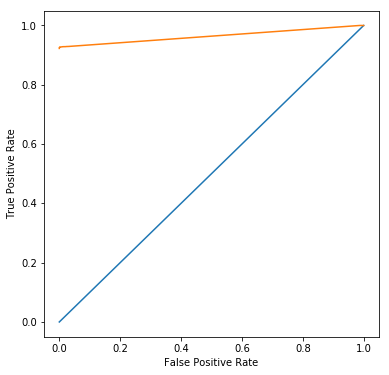

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# logreg = LogisticRegression()
# logreg.fit(xtrain,np.ravel(ytrain))
y_score=gb.predict_proba(X_train)[:,1]

fpr, tpr,_ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');